In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x, y = np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    pi = 4*n_hits/N
    return pi

n_runs = 500
n_trials = np.logspace(4,12,base=2,num=9)
y = []

for t in n_trials:
    desv = 0
    for run in range(n_runs-1):
        desv += abs(direct_pi(int(t))-np.pi)
    desv /= n_runs
    y.append(desv)

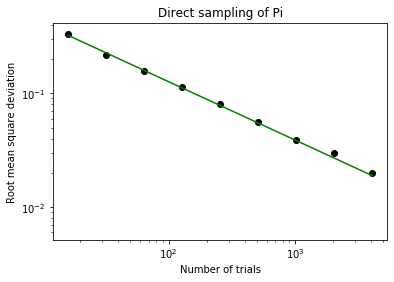

In [2]:
def exp(x,a,b):
    return b*x**-a
popt,pcov=curve_fit(exp,n_trials,y)

plt.scatter(n_trials,y, c='k')
plt.plot(n_trials,exp(n_trials,*popt), c='g')
plt.ylabel('Root mean square deviation')
plt.yscale('log')
plt.xlabel('Number of trials')
plt.xscale('log')
plt.title('Direct sampling of Pi')
plt.show()

In [3]:
def markov_pi0(N, delta):
    n_hits = 0
    x, y = np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)
    for i in range(N):
        dx = np.random.uniform(-delta,delta)
        dy = np.random.uniform(-delta,delta)
        if abs(x+dx) < 1 and abs(y+dy)<1:
            x += dx
            y += dy
        else:
            x, y = np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    n_hits = 4*n_hits/N
    return n_hits

In [4]:
def markov_pi(N, delta):
    n_hits = 0
    x, y = np.random.uniform(-1.0, 1.0), np.random.uniform(-1.0, 1.0)
    for i in range(N):
        dx = np.random.uniform(-delta,delta)
        dy = np.random.uniform(-delta,delta)
        if abs(x+dx) < 1 and abs(y+dy)<1:
            x += dx
            y += dy
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    n_hits = 4*n_hits/N
    return n_hits

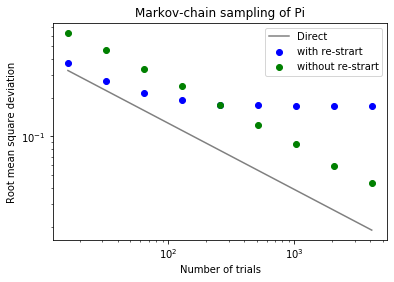

In [5]:
markov0 = []
markov = []
for t in n_trials:
    desv0 = 0
    desv = 0
    for run in range(n_runs-1):
        desv0 += abs(markov_pi0(int(t),1)-np.pi)
        desv += abs(markov_pi(int(t),1)-np.pi)
    desv0 /= n_runs
    desv /= n_runs
    markov0.append(desv0)
    markov.append(desv)

plt.scatter(n_trials,markov0, c='b', label = 'with re-strart')
plt.scatter(n_trials,markov, c='g', label = 'without re-strart')
plt.plot(n_trials,exp(n_trials,*popt), c='gray', label='Direct')
plt.legend()
plt.ylabel('Root mean square deviation')
plt.yscale('log')
plt.xlabel('Number of trials')
plt.xscale('log')
plt.title('Markov-chain sampling of Pi')
plt.show() 

El error del método de Markov sin reinicio (con delta = 1.0) sigue la misma tendencia que el del método directo, lo que no sucede con el método con reinicio, además muestra errores mucho más bajos con N más grandes con respecto a este. Sin embargo el método sin reinicio muestra errores mas bajos con N menores a 100.

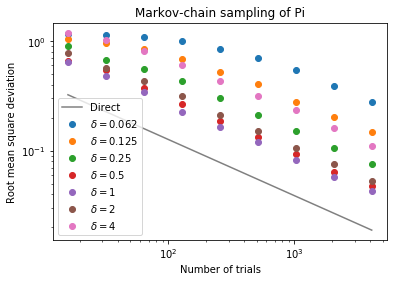

In [6]:
deltas = [0.062,0.125,0.25,0.5,1,2,4]

for d in deltas:
    y1 = []
    for t in n_trials:
        desv = 0
        for run in range(n_runs-1):
            desv += abs(markov_pi(int(t),d)-np.pi)
        desv /= n_runs
        y1.append(desv)
    plt.scatter(n_trials,y1,label='$\delta= $'+str(d))
    plt.legend()

plt.plot(n_trials,exp(n_trials,*popt), c='gray', label='Direct')
plt.legend()
plt.ylabel('Root mean square deviation')
plt.yscale('log')
plt.xlabel('Number of trials')
plt.xscale('log')
plt.title('Markov-chain sampling of Pi')
plt.show() 

Con $\delta = 1.0$ se obtienen los resultados más precisos.
Si los valores de $\delta$ son muy pequeños todos los saltos que se den y las posiciones que se registren van a estar muy cerca del punto inicial, por lo cual no se alcanzaria a recorrer todo el cuadrado. Por otro lado si los valores de $\delta$ son muy grandes se pueden dar saltos de lado a lado del cuadrado por lo cual no se estaria recorriendo uniformemente el circulo.
Este método tiene más error que el método directo porque al ser una marcha no es tan probable que lo puntos esten uniformemente distribuidos, lo que si pasa en el metodo directo que se registran puntos uniformemente distribuidos en todo el cuadrado.

In [7]:
def ballDynamics(N):
    i,j = np.random.randint(1,4),np.random.randint(1,4)
    h = int(str(i)+str(j))
    h = h-i*10+(i-1)*3
    hist = [h]
    delta = [0,1]
    signo = [-1,1]
    for n in range(N-1):
        di = np.random.choice(delta)
        if di==0:
            dj = np.random.choice(signo)
        else:
            di = np.random.choice(signo)
            dj = 0
        if i+di>0 and i+di<4 and j+dj>0 and j+dj<4:
            i += di
            j += dj
        h = int(str(i)+str(j))
        h = h-i*10+(i-1)*3
        hist.append(h) 
    return hist

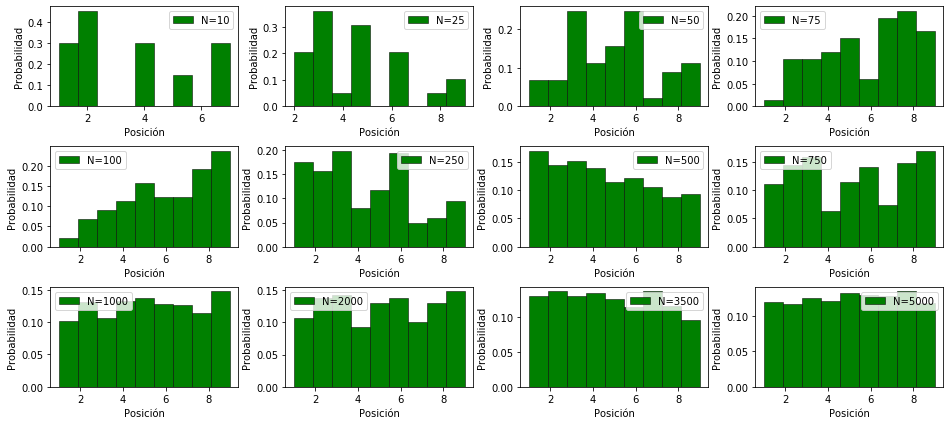

In [13]:
N = [10,25,50,75,100,250,500,750,1000,2000,3500,5000]
plt.figure(figsize=(16,7))
DKL = []
for n in N:
    dkl = 0
    plt.subplot(3,4,N.index(n)+1)
    F,x,fig = plt.hist(ballDynamics(n),density='true',bins=9,color='g',edgecolor='k',linewidth=0.5,label='N='+str(n))
    for f in F:
        if f!=0:
            dkl += f*np.log(f*9)
    DKL.append(dkl)
    plt.xlabel('Posición')
    plt.ylabel('Probabilidad')
    plt.legend()
plt.subplots_adjust(hspace=0.4,wspace=0.25)
plt.show()

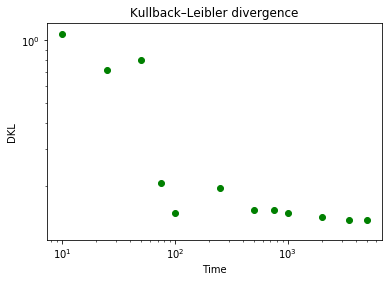

In [12]:
plt.scatter(N,DKL,c='g')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('DKL')
plt.title('Kullback–Leibler divergence')
plt.show()

Se puede ver en la imagen de los histogramas que el registro de las posiciones a medida que se usan tiempos más grandes se acercan más a una distribución uniforme, lo cual también se puede observar en la gráfica de la divergencia de Kullback–Leibler puesto que con tiempos más grandes más se acarcan a valores del orden de $1/10$